# Lecture 4: Likelihood and Maximum Likelihood Estimate

## Instructor： 胡传鹏（博士）[Dr. Hu Chuan-Peng]

### 南京师范大学心理学院[School of Psychology, Nanjing Normal University]
 


## Recap of previous lecture


### Conditional Probability (条件概率)
#### $P(A|B) = \frac{ P(B|A)*P(A)} {P(B)}$




### Parameters (模型参数)

#### 伯努利分布
####  $f(k,p) = p^{k}(1-p)^{1-k}$


#### 二项分布(Binomial distribution)
#### $b(k,n,p) = \binom{k}{n} p^{k}(1-p)^{n-k}$

#### 超几何分布
#### $p(k,n,K,N)=\frac{\binom{K}{k}\binom{N-K}{n-k} }{\binom{N}{n} }$


#### 泊松分布
#### $f(k)=exp(-\mu)\frac{\mu^k}{k!}$

#### 正态分布(Normal distribution)
#### $f(x) = \frac{1}{\sigma \surd {2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

#### t分布(Normal distribution)
#### $f(x,v)=\frac{\Gamma ((v+1)/2)}{\sqrt{\pi v}\gamma(v/2) }(1+x^2/v) ^{-(v+1)/2}$


## Goal of this lecture

### Understand Bayes Theorem
### Understand likelihood and distinguish between likelihood and probability
### Understand Maximum Likelihood Estimate

## Part 1: Concept of Likelihood

### From Bayes rule to Bayes theorem


#### $P(A|B) = \frac{ P(B|A)*P(A)} {P(B)}$

#### $P(A)$代表事件$A$发生的概率

#### $P(B|A)$代表事件$A$发生的情况下，事件$B$发生的条件概率

#### $P(B)$代表事件$B$发生的概率

#### $P(A|B)$代表事件$B$发生的情况下，事件$A$发生的条件概率


无论是频率学派还是贝叶斯学派看来，$P(A|B) = \frac{ P(B|A)*P(A)} {P(B)}$ 仅仅是一种条件概率的计算公式

但是在贝叶斯学派的视角中，$P(A|B) = \frac{ P(B|A)*P(A)} {P(B)}$还可以用来表征对世界的信念

在这种情况下，我们对世界的信念来自于某个模型，我们根据观察到的现象不断更新对世界的信念

因此，我们可以将贝叶斯公式表述为 $p(\theta|data)=\frac{p(data|\theta)p(\theta)}{p(data)}$ ，这也被称为贝叶斯定理


#### $p(\theta|data)=\frac{p(data|\theta)p(\theta)}{p(data)}$ 

其中，$p(\theta)$表示我们对模型参数的先验的信念

$p(data|\theta)$表示我们在某一先验信念下观察到当前现象的概率

$p(data)$表示所有情况下我们观察到当前现象的概率之和

$p(\theta|data)$表示我们观察到当前现象的情况下模型参数出现的概率



![avatar](./figure/friend.png)


当我们走在路上看到一个迎面走来一个人，你觉得他看起来像是你的朋友，但又不太确定，这时你会根据贝叶斯定理来更新你脑海中关于这个人是不是你的朋友的信念。

我们在脑海中建立一个模型来判断中而换个人是否是我们的朋友

在这种情况下，我们将$p(\theta)$表征为这个人是朋友的先验概率，将$p(data|\theta)$表征为在相应的先验下观察到当前现象的概率，$p(\theta|data)$表征为在穿插到当前现象的情况下，判断这个人是否是朋友的概率。


![avatar](./figure/bayes1.png)

当走在朋友居住的街区，你会觉得这个人是你朋友的先验会很大，即使没有那么强的证据，也会觉得这个人是你的朋友


当走在陌生的小镇，你会觉得这个人是你朋友的先验会很小，在证据不是很强的情况下，也会觉得这个人是一个陌生人

![avatar](./figure/bayes22.png)

当走在朋友居住的街区，你会觉得这个人是你朋友的先验会很大，但是当那个人走近你，你会发现他长的并不像你的朋友，你会做出这个人不是你的朋友的判断

当走在朋友居住的街区，你会觉得这个人是你朋友的先验会很大，但是当那个人走近你，你他长的很像你的朋友，你会做出这个人是你的朋友的判断

### What is likelihood vs. probability


贝叶斯公式解释了我们如何计算后验概率分布：

#### $p(\theta|data)=\frac{\pmb{p(data|\theta)}p(\theta)}{p(data)}$ 

其中，我们将 $p(data|\theta)$ 称为似然

为了理解似然，我们可以用一个简单抛硬币的例子来进行解释。

我们忽略硬币投掷的角度，硬币在表面上的高度以及任何其他细节。

我们没有办法在投掷硬币前知道投掷硬币的结果，所以投掷硬币的结果对我们来说是不确定的。


我们可以用模型来对这种情况进行表征

**该模型的第一个假设为**：在假定硬币是公平的情况下，我们可以知道硬币正面朝上的概率是1/2.

若 $\theta$ 表示硬币正面朝上的概率，则 $\theta=1/2$



**该模型的第二个假设为**：如果该硬币投掷两次，第一次投掷的结果不会对第二次投掷的结果产生影响。

即该硬币每一次投掷的结果是相互独立的。

我们可以对投掷两次硬币，两次正面朝上的概率进行计算：

$Pr(H,H|\theta,Model)=Pr(H|\theta,Model)*Pr(H|\theta,Model) = \theta * \theta = (1/2)^{2}=1/4$



我们还可以对投掷两次硬币，所有正面朝上的情况的概率进行计算：

投掷硬币两次，正面朝上的情况有3种：正面朝上的次数分别为0，1，2


<div style="text-align: center;">	
	
**三种情况下的概率分布图**	

</div>

![avatar](./figure/coin_prob.png)

- 每种情况下的概率都是非负数

- 所有情况下的概率之和为1

当我们固定 $\theta$，我们会得到一个关于所有可能情况的概率分布。

那么为什么我们将$p(data|\theta)$ 称为likelihood(似然)，而不是probablity(概率)？

在贝叶斯推理中，我们不保持模型的参数$\theta$固定，即数据是固定的，参数是变化的。

若模型的$\theta$未知，但是硬币投掷的结果已知，我们需要根据硬币投掷的结果来推断模型的$\theta$。

即我们计算在$\theta$取不同值的情况下，出现当前结果的概率$p(data|\theta)$。



<div style="text-align: center;">	
	
**投掷硬币一次的情况下的正面朝上的概率图**	

</div>

![avatar](./figure/theta_prob.png)


x轴：投掷一次硬币正面朝上的概率$\theta$

y轴：投掷一次硬币观察到的结果为硬币正面朝上的概率


若我们投掷两次硬币，得到的结果是正面朝上的次数为1。我们可以计算在任意$\theta$的情况下出现当前结果的概率。

即 $Pr(H,T|\theta)+Pr(T,H|\theta) = \theta(1-\theta)+\theta(1-\theta)=2\theta(1-\theta)$

<div style="text-align: center;">	
	
**投掷硬币两次的情况下的正面朝上1次的概率图**	

</div>

![avatar](./figure/twice_prob.png)

$任意\theta情况下，投掷两次硬币正面朝上次数为1的概率总和$

<div style="text-align: center;">	
	
**$\int 2\theta(1-\theta)d\theta = 1/3 $**	

</div>


$任意\theta情况下，投掷两次硬币正面朝上次数为1的概率总和\ne 1$

所以该分布不是一个有效的概率分布。

即当我们改变$\theta$，$p(data|\theta)$不是一个有效的概率分布

于是我们使用likelihood(似然)来描述$p(data|\theta)$，我们将其表示为$L(\theta|data)=p(data|\theta)$

## Part 2: likelihood in Python

### The probability/likelihood for two coin flips


我们可以使用另一个例子来描述似然和概率的差异。

若我们投掷一个硬币两次，我们可以考虑一下所有可能发生的情况。

$Pr(X=0|\theta)=Pr(T,T|\theta)=Pr(T|\theta)*Pr(T|\theta)=(1-\theta)^2$

$Pr(X=1|\theta)=Pr(H,T|\theta)+Pr(T,H|\theta)=2*Pr(T|\theta)*Pr(H|\theta)=2\theta(1-\theta)$

$Pr(X=2|\theta)=Pr(H,H|\theta)=Pr(H|\theta)*Pr(H|\theta)=\theta^2$

In [ ]:
# 投掷一个硬币两次，如何求不同theta下，正面朝上的次数的概率

# 计算投掷一个硬币两次，theta为0.2的情况下，正面朝上的次数为2的概率

# theta 为0.2
theta = 0.2

# Pr(X=2|\theta)=\theta^2
prob = (theta**2)*((1-theta)**0)

# 输出结果
print(f"投掷一个硬币两次，theta为0.2的情况下，正面朝上的次数为2的概率为{prob}")

In [ ]:
######################################################
# 练习阶段 计算表格中对应概率
######################################################

我们可以预设$\theta \in  [ 0,0.2,0.4,0.6,0.8,1.0 ] $


| $\theta$  |      0      |  1 |      2      |  Total |
|----------|:-------------:|------:|:-------------:|------:|
| 0 |   | |   | |
| 0.2 |       | |  | |
| 0.4 |  | |   |  |
| 0.6 |  | |   |  |
| 0.8 |    | |  | |
| 1.0 |  |   |  | |
| Total | |  |  | |

| $\theta$  |      0      |  1 |      2      |  Total |
|----------|:-------------:|------:|:-------------:|------:|
| 0 |  1 |0 | 0  |1 |
| 0.2 |   0.64    |0.32 | 0.04 |1 |
| 0.4 | 0.36 |0.48 | 0.16  | 1 |
| 0.6 | 0.16 | 0.48| 0.36  | 1 |
| 0.8 |  0.04  |0.32 |0.64  |1 |
| 1.0 | 0 |  0 | 1 |1 |
| Total |2.2 | 1.6 | 2.2 | |

### How to choose an appropriate likelihood


假设你现在是医院医生，要估计某种疾病的患病率。我们从一个样本开始，我们没有先验信息。让这个人（样本）的疾病状态用$X$来表示 

$ X=
\begin{cases}
0, & \text{没生病}\\
1, & \text{生病了}
\end{cases}
$


$\theta$代表一个随机选择的个体患有这种疾病的概率。我们现在计算一个样本每一个可能结果的概率

$P(X=0|\theta)=(1-\theta)$

$P(X=1|\theta)=(\theta)$

我们可以根据上面的公式，基于1或是0（生病还是没生病）写下一个表达式：

$
P(X=a|\theta)=\theta^a(1-\theta)^{1-a} \qquad where \quad a\in \left\{0， 1\right\}
$

我们可以使用python代码来实现上面的例子。首先先加载numpy库。

之后我们定义一个函数，n就是样本量，在我们例子中为1；a是我们样本生病还是没生病的情况；最后是$\theta$，我们随机选中一个个体生病的概率。

In [ ]:
# 用于计算、处理多维数组的python包
import numpy as np 

# 用于画图的包
import matplotlib.pyplot as plt

In [ ]:
# def开始定义函数，紧接着是函数名，括号内部为函数的参数

# n 为个体数目， a为是否患病， theta为个体患病概率
def likelihood(n,a, theta):
    like_fun = (theta**a*(1-theta)**(n-a))
    return like_fun

如果得这种病的概率是0.5，我们可以计算一下假设这里我们一个样本生病了的概率

In [ ]:
likelihood(1, 1, 0.5)

0.5

我们也可以使用不同的$\theta$

In [ ]:
theta1 = np.arange(0, 1.2, 0.2)# 使用numpy生成一个数组，0为开始，1.2为结束（不包括1.2），0.2为步长生成6个theta

In [ ]:
likelihood(1, 1, theta1)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
likelihood(1, 0, theta1)

array([1. , 0.8, 0.6, 0.4, 0.2, 0. ])

我们可以尝试将上述两种情况进行可视化，观察不同参数情况下，一个样本生病的概率

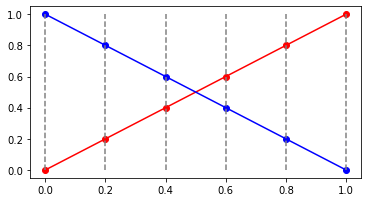

In [ ]:
# 新建画布和坐标轴
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')


# 不同参数情况下，个体患病的概率的散点图，x轴为不同参数，y轴为个体患病概率
plt.scatter(x=theta1, y = likelihood(1, 1, theta1), c = "red")

# 不同参数情况下，个体不患病的概率的散点图，x轴为不同参数，y轴为个体患病概率
plt.scatter(x=theta1, y = likelihood(1, 0, theta1), c = "blue")


# 不同参数情况下，个体患病的概率的折线图，x轴为不同参数，y轴为个体患病概率
plt.plot(theta1, likelihood(1, 1, theta1),c = "red")


# 不同参数情况下，个体不患病的概率的折线图，x轴为不同参数，y轴为个体患病概率
plt.plot(theta1, likelihood(1, 0, theta1),c = "blue")

# 增加垂直线，注意，在同一个theta下，生病和不生病的概率相加始终为1
plt.vlines(theta1,0,1, linestyles="dashed", color = "grey")

若我们有一组样本量为N的个体，我们想要制作一个模型，这个模型能够描述样本中患病数Z的概率。

在制作模型前，我们进行了一些简单的假设

假设1：每个人患病的概率是相互独立的

假设2：样本中的个体来自同一总体


每个人患病的概率为：
$\theta为个体患病的概率$

$Pr(X=\alpha|\theta)=\theta^\alpha(1-\theta)^{1-\alpha}$

$\alpha = 0  / 1$

#### 若N=2，两个人患病的概率为：

$Pr(X_1=\alpha_1,X_2=\alpha_2|\theta_1,\theta_2)=Pr(X_1=\alpha_1|\theta_1)*Pr(X_2=\alpha_2|\theta_2)=\theta_1^{\alpha_1}(1-\theta_1)^{1-\alpha_1}*\theta_2^{\alpha_2}(1-\theta_2)^{1-\alpha_2}$

$\alpha = 0  / 1$

若$ \theta = \theta_1 =\theta_2 $，两个人患病的概率为：

$Pr(X_1=\alpha_1,X_2=\alpha_2|\theta)=\theta^{\alpha_1}(1-\theta)^{1-\alpha_1}*\theta^{\alpha_2}(1-\theta)^{1-\alpha_2}=\theta^{\alpha_1 + \alpha_2}(1-\theta)^{2-\alpha_1-\alpha_2}$

$\alpha = 0  / 1$

# Example:

若$\theta_1=0.4$, $\theta_1=0.7$ ，2个人中有一个人患病的概率为多少？

In [ ]:
# 定义一个函数，这个函数可以用来计算每一个个体患病的概率

# def 定义函数名，()内为函数的参数
# alpha = 0 为个体未患病
# alpha = 1 为个体未患病
# theta为个体患病的概率
def porb(alpha,theta): 

    # return 后为该函数返回的对象
    return (theta**alpha)*((1-theta)**(1-alpha)) 

# 个体1患病
alpha1 = 1
# 个体2不患病
alpha2= 0
# 个体1患病的概率为0.4
theta1 = 0.4
# 个体1患病的概率为0.7
theta1 = 0.7

# 计算个体1患病的概率
prob1 = prob(alpha1,theta1)
# 计算个体2患病的概率
prob2 = prob(alpha2,theta2)

# 计算2个个体中有1个患病的概率
likelihood = prob1*prob2

# 输出结果
print(f"2个人中有一个人患病的概率为{likelihood}")


若$\theta=0.8$，2个人中有一个人患病的概率为多少？


In [7]:
# 定义一个函数，这个函数可以用来计算每一个个体患病的概率

# def 定义函数名，()内为函数的参数
# alpha = 0 为个体未患病
# alpha = 1 为个体未患病
# theta为个体患病的概率
def porb(alpha,theta):
    return (theta**alpha)*((1-theta)**(1-alpha))

# 个体1患病
alpha1 = 1
# 个体2不患病
alpha2= 0
# 个体患病的概率
theta = 0.8

# 计算个体1患病的概率
prob1 = prob(alpha1,theta)
# 计算个体2患病的概率
prob2 = prob(alpha2,theta)

# 计算2个个体中有1个患病的概率
likelihood = prob1*prob2

# 输出结果
print(f"2个人中有一个人患病的概率为{likelihood}")

0.15999999999999998

# Q1:

若$\theta=0.2$，2个人中有一个人患病的概率为多少？

In [ ]:
######################################################
# 练习阶段
######################################################

# Tips：如何表征个体患病的情况
def porb(alpha,theta):
    return (theta**alpha)*((1-theta)**(1-alpha))

alpha1 = &&&
alpha2= &&&
theta = &&&

prob1 = prob(alpha1,theta)
prob2 = prob(alpha2,theta)

likelihood = prob1*prob2


print(f"2个人中有一个人患病的概率为{likelihood}")

# Q2:

若$\theta=0.4$，2个人中有2个人患病的概率为多少？

In [ ]:
######################################################
# 练习阶段
######################################################

# Tips：如何表征个体患病的情况
def porb(alpha,theta):
    return (theta**alpha)*((1-theta)**(1-alpha))

alpha1 = &&&
alpha2= &&&
theta = &&&

prob1 = prob(alpha1,theta)
prob2 = prob(alpha2,theta)

likelihood = prob1*prob2



print(f"2个人中有2个人患病的概率为{likelihood}")

$Z=X_1+X_2$

患病人数的情况可以用下列公式进行表示：

$ Pr(Z=0|\theta) = Pr(X_1 =0 , X_2 = 0| \theta) = (1-\theta)^2 $

$ Pr(Z=1|\theta) = Pr(X_1 =1 , X_2 = 0| \theta) = 2\theta(1-\theta) $

$ Pr(Z=2|\theta) = Pr(X_1 =1 , X_2 = 1| \theta) = \theta^2 $

这个公式可以用一个普遍的形式进行表达：

$ Pr(Z=\beta|\theta) = \binom{2}{\beta} \theta^{\beta}(1-\theta)^{2-\beta}$

#### 当N=3时，患病人数的情况可以用下列公式进行表示：


$ Pr(Z=0|\theta) = Pr(X_1 =0 , X_2 = 0, X_3 = 0| \theta)  $

$ Pr(Z=1|\theta) = 3Pr(X_1 =1 , X_2 = 0, X_3 = 0| \theta)  $

$ Pr(Z=2|\theta) = 3Pr(X_1 =1 , X_2 = 1, X_3 = 0| \theta) $

$ Pr(Z=3|\theta) = Pr(X_1 =1 , X_2 = 1, X_3 = 1| \theta)  $

这个公式可以用一个普遍的形式进行表达：

$ Pr(Z=\beta|\theta) = \binom{3}{\beta} \theta^{\beta}(1-\theta)^{3-\beta}$

# Example:

若$\theta_1=0.5$，3个人中有一个人患病的概率为多少？

In [8]:
# comb这个函数是专门用来算组合数的
from scipy.special import comb


In [10]:
# 定义一个函数，这个函数可以用来计算n个个体中m人患病的概率

# def 定义函数名，()内为函数的参数
# n为个体数
# m为患病人数
# theta为个体患病的概率
def likelihood(n,m,theta):
    return comb(n,m)*((theta)**(m))*((1-theta)**(n-m))

# 个体患病概率为0.8
theta = 0.8
# 共有3个个体
n=3
# 患病人数为1
m=1
# 计算个体患病概率为0.8的情况下，3个个体中1人患病的概率
likelihood = likelihood(n,m,theta)


# 输出结果
print(f"个体患病概率为0.8的情况下，3个个体中1人患病的概率为{likelihood}")

0.09599999999999996

当N=N时，患病人数的情况可以用一般公式进行表示：

$ Pr(Z=\beta|\theta) = \binom{N}{\beta} \theta^{\beta}(1-\theta)^{N-\beta}$

# Q3:

若$\theta=0.5$，10个人中有5个人患病的概率为多少？

In [ ]:
######################################################
# 练习阶段
######################################################

#tips：若theta=0.5，10个个体，5个人患病该如何表征？
def likelihood(n,m,theta):
    return comb(n,m)*((theta)**(m))*((1-theta)**(n-m))



theta =&&&&
n=&&&&
m=&&&&
likelihood = likelihood(n,m,theta)

print(f"个体患病概率为0.5的情况下，10个个体中5人患病的概率为{likelihood}")

# Bonus:一组被试的智力测试分数

假设我们对一组被试进行智力测试，测试分数的范围是0-200。假设我们没有关于个体特征的信息来帮助预测，同时一个人的智力测试分数可能会有多个因素影响，我们假设一个人的分数是所有这些因素的平均值，那么中心极限定理可能适用，我们可以使用正态分布来模拟测试分数X：

$p(X=a|\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(a-\mu)^2}{2\sigma^2}}$

现在考虑一个由N个个体组成的样本。如果我们假设一个人的考试成绩无助于预测另一个人的成绩，那么我们的数据就是独立的。如果我们还假设所有的个体都来自同一个群体，我们就有一个随机样本。然后，我们可以通过取个体概率密度的乘积来计算N个个体样本的联合概率密度：

$p(X_1=a_1, X_2=a_2, ..., X_N=a_N|\mu, \sigma)=\prod\limits_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(a-\mu)^2}{2\sigma^2}}$

In [ ]:
# 定义正态分布的概率密度函数，a为数据，mu为平均值，sigma为标准差
def pdf(a, mu, sigma):

    # 正态分布的概率密度函数
    fx = np.exp(-(a-mu)**2/(2*sigma**2))*1/np.sqrt(2*np.pi*sigma**2)
    
    # 返回正态分布的概率密度函数的值
    return fx

# 以60为起点，180为终点(不包括80)，步长为20生成数组
a_n = np.arange(60, 180, 20)

#在pdf函数中，mu是总体均值，100是总体标准差，a是个体的智力测验分数
a_pdf = pdf(a_n, 80, 100)

#np.prod是连乘函数
likelihood = np.prod(a_pdf)

print(f"观察到这组数据的概率为{likelihood}")